# Linked List

É uma estrutura linear onde os elementos não estão alocados numa parte contínua da memória. Cada elemento fica em um nó, onde aponta para outro nó e assim por diante. O primeiro nó é chamado de `head`.

**Quando utilizar?**

- Inserir/deleta com tempo constante
- Quando não se sabe quantos itens terá na lista
- Você não precisa acessar aleatoriamente nenhum elemento
- Inserir itens no meio da lista

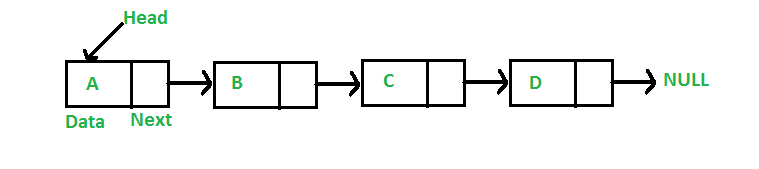

## Implementações

### Linked List

In [1]:
class Node:
    def __init__(self, value):
        self.next = None
        self.value = value

In [2]:
class LinkedList:
    def __init__(self):
        self._head = Node(None)
        self._tail = None

    def insert_node_to_tail(self, node):
        self.tail().next = node

    def insert_node_to_head(self, node):
        if self.head():
            head = self._head
            node.next, head.next = self._head.next, node
            return
        self._head.next = node

    def is_empty(self):
        return self._head.next is None

    def head(self):
        return self._head.next

    def tail(self):
        current = self._head
        while current.next:
            current = current.next
        return current

In [3]:
import unittest

class LinkedListTests(unittest.TestCase):
    def setUp(self):
        self.linked_list = LinkedList()

    def test_insert_first_node_to_tail(self):
        self.linked_list.insert_node_to_tail(Node('tail'))
        self.assertEqual('tail', self.linked_list.tail().value)

    def test_insert_first_node_to_head(self):
        self.linked_list.insert_node_to_head(Node('head'))
        self.assertEqual('head', self.linked_list.head().value)

    def test_insert_two_nodes_to_head(self):
        self.linked_list.insert_node_to_head(Node('head2'))
        self.linked_list.insert_node_to_head(Node('head1'))
        self.assertEqual('head1', self.linked_list.head().value)

    def test_insert_two_nodes_to_tail(self):
        self.linked_list.insert_node_to_tail(Node('tail2'))
        self.linked_list.insert_node_to_tail(Node('tail1'))
        self.assertEqual('tail1', self.linked_list.tail().value)

    def test_insert_nodes_to_head_and_tail(self):
        self.linked_list.insert_node_to_head(Node('head'))
        self.linked_list.insert_node_to_tail(Node('tail'))
        self.assertEqual('head', self.linked_list.head().value)
        self.assertEqual('tail', self.linked_list.tail().value)

    def test_is_empty_with_empty_linked_list(self):
        self.assertTrue(self.linked_list.is_empty())

    def test_is_empty_with_two_nodes(self):
        self.linked_list.insert_node_to_head(Node('element1'))
        self.linked_list.insert_node_to_head(Node('element2'))
        self.assertFalse(self.linked_list.is_empty())

unittest.main(argv=['first-arg-is-ignored'], exit=False)

.......
----------------------------------------------------------------------
Ran 7 tests in 0.025s

OK


### Doubly Linked List

O DLL possui um ponteiro a mais para o nó anterior.

**Vantagens**

- Uma DLL pode ser percorrida tanto na direção para frente quanto para trás
- A operação de exclusão na DLL é mais eficiente se o ponteiro para o nó a ser excluído for fornecido.
- Podemos inserir rapidamente um novo nó antes de um determinado nó.

**Desvantagens**

- Cada nó da DLL requer espaço extra para um ponteiro anterior. É possível implementar DLL com um único ponteiro embora (veja isto e isto).
- Todas as operações requerem um ponteiro extra anterior para serem mantidas. Por exemplo, na inserção, precisamos modificar os ponteiros anteriores junto com os próximos ponteiros.

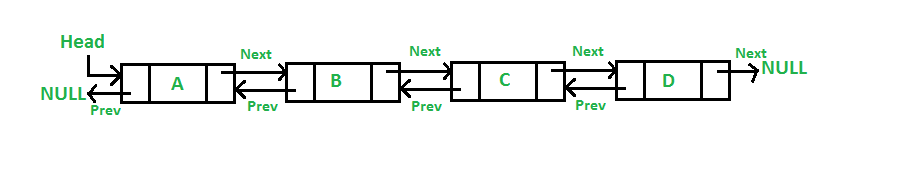

In [4]:
class DoublyNode:
    def __init__(self, value):
        self.next = None
        self.prev = None
        self.value = value


class DoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None


    def insert_node_to_head(self, new_node):
        if new_node is None: return False

        new_node.next, new_node.prev = self.head, None

        if self.head is not None:
            self.head.prev = new_node
        
        self.head = new_node
        return new_node.value

    
    def insert_node_to_tail(self, new_node):
        if new_node is None: return False

        new_node.prev, new_node.next = self.tail, None

        if self.tail is not None:
            self.tail.next = new_node

        self.tail = new_node
        return new_node.value


    def insert_node_after_node(self, prev_node, new_node):
        if prev_node is None or new_node is None:
            return False

        new_node.next, prev_node.next = prev_node.next, new_node
        new_node.prev = prev_node

        if new_node.next is not None:
            new_node.next.prev = new_node

        return new_node.value

    def insert_node_before_node(self, next_node, new_node):
        if next_node is None or new_node is None:
            return False

        new_node.next = next_node

        if next_node.prev is not None:
            next_node.prev.next = new_node

        new_node.prev = next_node.prev
        next_node.prev = new_node 
        return new_node.value


### Circular Linked List